In [178]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as cst


In [179]:
q = 1#-1.6E-19 #not sure what to do with the increase in speed and the particle reaching the speed higher than c
m = 1#9.11E-31
N = 2 # number of particles

mass_array = np.transpose(np.ones(N))*m
mass_array = mass_array[:,None]   #making an array of N x 1
print('mass_array',mass_array)

q_array = np.transpose(np.ones(N))*q
q_array = q_array[:,None]
print('q_array',q_array)

delta_t = 0.005
E_ext = np.array([0,0,0])*1E-10  #needs to be updated according the penning trap potential
B_ext = np.array([0,0,5]) #1])*1E-8


#v_array_old = np.zeros(shape = (N,3)) #for N particles with v = 0
v_array_old = np.array([[0.001,0,0],]*N)
print('v_array_old',v_array_old)

v_array_new = np.zeros(shape = (N,3))

#r = np.random.randint(11,size=(N,3)) 
r_array_old = np.array([[1,0,0],[-1,0,0]])  #for 2 particles
#for 1 particle only:
#r_array_old = np.array([[1,1,1]]) #np.array([1,0,0])
print('r_array_old',r_array_old)

r_array_new = np.zeros(shape = (N,3))

mass_array [[1.]
 [1.]]
q_array [[1.]
 [1.]]
v_array_old [[0.001 0.    0.   ]
 [0.001 0.    0.   ]]
r_array_old [[ 1  0  0]
 [-1  0  0]]


In [180]:
#calculating electric field
eps0 = 8.8541878128E-12

#README: change this back to 1/(4*math.pi*eps0)
k = 1/(4*math.pi*eps0)
k=1
print(k)

1


In [181]:
#calculating B field
B_array = B_ext
print('B_array = ',B_array)

w_c = q*B_array/m
f_c = np.linalg.norm(w_c/(2*math.pi))
print('ECR freq f_c = ', f_c)
Time_max = 1/f_c
print('Time_max = ', Time_max)

print('v_array_old',v_array_old)

B_array =  [0 0 5]
ECR freq f_c =  0.7957747154594768
Time_max =  1.2566370614359172
v_array_old [[0.001 0.    0.   ]
 [0.001 0.    0.   ]]


In [182]:
B_array

array([0, 0, 5])

In [185]:
#calculate forces between particles, velocities, and position

from sympy import symbols, Eq, solve, Matrix, linsolve

T = 0
#print(np.zeros(shape=(N,3)))
dr_array = np.array([np.zeros(shape=(N-1,3)),]*N)
dr_mag_array = np.zeros(shape=(N,1))
E_array = np.array([np.zeros(3),]*N)   #initialized E_array
print('E_array', E_array)

v_track = []
r_track = []
t_track = []

test_r_final = []  # this list stores final positions after each loop for comparison
test_t_final = []
    
print('v_array_old',v_array_old)
while(T<2):#0.5*1/f_c):
    for i in range(N):
        r_i = r_array_old[i]
        r_others = np.append(r_array_old[0:i,:],r_array_old[i+1:N,:],axis = 0)  #get rid of the self particle from the array
#         print('r_others',r_others)

        dr = -1*(r_others - r_i)
#         print('dr',dr)

        dr_mag = np.linalg.norm(dr)
        E_others = k*q*dr/(dr_mag**3)
#         print('E_others', E_others)
        E_i = E_ext + np.sum(E_others, axis = 0)  #sums up all the E-field from other particles and external E-field

        #store the calculated dr in array of size N
        dr_array[i] = dr
        dr_mag_array[i] = dr_mag
        E_array[i] = E_i   
    
#     print('E_array',E_array)
    #At the end of the array, we have as a main thing: E-field whose rows correspond to each particle

    Omega_cst = q_array*delta_t/(mass_array) #cst.c)   README change back to cst.c

    v_minus = v_array_old + delta_t/2*(q_array/mass_array)*E_array
#     print('v_array_old',v_array_old)
    print('v_minus',v_minus)  
    
    for i in range(N):  #README is there more efficient way to calculate v_plus?? 
        c = -Omega_cst[i][0]/2
        #print(Omega_cst/2)
        
        B1= B_array[0]
        B2 = B_array[1]
        B3 = B_array[2]
        vplus_x,vplus_y,vplus_z = symbols('vplus_x,vplus_y,vplus_z')
    
        a = [[1, c*B3, -c*B2], [- c*B3, 1, c*B1], [c*B2, -c*B1, 1]]
#         print('a',a)
        #eq = Eq([[x + c*(y*B3 - z*B2)], [y - c*(x*B3 - z*B1)], [z + c*(x*B2 - y*B1)]])
#         print('v_minus i =', v_minus[i])
        b = -c*np.cross(v_minus[i],B_array) + v_minus[i]
#         print('b = ',b)
        sol = np.linalg.solve(a, b)
        #print(sol)
#         sol = linsolve([a,b], (vplus_x, vplus_y, vplus_z))
#         print(sol)
        
#         v_plus = list(sol)[0]
#         v_plus = np.array([v_plus[0],v_plus[1],v_plus[2]])
#         #print('v_plus',v_plus)
        v_plus=sol
#         print(v_plus)
        v_array_new[i] = v_plus + (q_array[i]*delta_t)/(2*mass_array[i])*E_array[i]
        #print('v_new',v_array_new[i])

#         print('T= ', T)
#         print('v_array_new',v_array_new)
 
    r_array_new = v_array_new * delta_t + r_array_old
    
    # to test if the final position in each loop fall in the close proximeter
    for i in range(5):
        if T > (Time_max*i-delta_t/2) and T < (Time_max*i + delta_t/2):
            test_t_final.append(T)
            test_r_final.append(r_array_new)
#     print('test_r_final',test_r_final)
    
    v_array_old = v_array_new
    r_array_old = r_array_new
    
    v_track.append(v_array_old)
    r_track.append(r_array_old)
    t_track.append(T)
    
    T += delta_t
    
print('end of updating v and r')
#print(B_array)
v_track = np.array(v_track)
r_track = np.array(r_track)
t_track = np.array(t_track)



E_array [[0. 0. 0.]
 [0. 0. 0.]]
v_array_old [[ 0.03901788 -0.03629103  0.        ]
 [-0.03829204  0.03442739  0.        ]]
v_minus [[ 0.03962502 -0.03640646  0.        ]
 [-0.03889919  0.03454282  0.        ]]
v_minus [[ 0.03991662 -0.03761645  0.        ]
 [-0.0392376   0.03573525  0.        ]]
v_minus [[ 0.04017731 -0.03883342  0.        ]
 [-0.03954552  0.03693583  0.        ]]
v_minus [[ 0.04040691 -0.0400566   0.        ]
 [-0.03982275  0.03814381  0.        ]]
v_minus [[ 0.04060526 -0.04128522  0.        ]
 [-0.0400691   0.03935843  0.        ]]
v_minus [[ 0.04077224 -0.04251851  0.        ]
 [-0.04028441  0.04057892  0.        ]]
v_minus [[ 0.04090774 -0.04375568  0.        ]
 [-0.04046854  0.0418045   0.        ]]
v_minus [[ 0.04101166 -0.04499595  0.        ]
 [-0.04062137  0.0430344   0.        ]]
v_minus [[ 0.04108392 -0.04623854  0.        ]
 [-0.04074279  0.04426785  0.        ]]
v_minus [[ 0.04112449 -0.04748266  0.        ]
 [-0.04083271  0.04550406  0.        ]]
v_minu

[[-1.00000125e+00 -4.68676769e-08  0.00000000e+00]
 [-1.00000875e+00  1.56513586e-08  0.00000000e+00]
 [-1.00002250e+00  3.43741676e-07  0.00000000e+00]
 ...
 [-1.01346639e+00  1.04025423e-01  0.00000000e+00]
 [-1.01329991e+00  1.04475165e-01  0.00000000e+00]
 [-1.01312823e+00  1.04921299e-01  0.00000000e+00]]


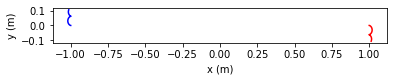

In [175]:
#plotting x vs y position
# plt.subplot(1,3,1)
r1_track = r_track[:,0,:]
#print(r1_track)
x1 = r1_track[:,0]
y1 = r1_track[:,1]

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().set_aspect('equal')
plt.plot(x1,y1, color = 'red')

#plt.subplot(1,3,2)
if N==2:
    r2_track = r_track[:,1,:]
    print(r2_track)
    x2 = r2_track[:,0]
    y2 = r2_track[:,1]
    plt.plot(x2,y2, color = 'blue')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.gca().set_aspect('equal')
    plt.show()


In [176]:
np.transpose(r1_track)[0]

array([1.00001125, 1.00002874, 1.00005245, 1.00008238, 1.00011851,
       1.00016081, 1.00020925, 1.00026381, 1.00032445, 1.00039113,
       1.00046381, 1.00054244, 1.00062697, 1.00071735, 1.00081353,
       1.00091543, 1.001023  , 1.00113616, 1.00125485, 1.00137899,
       1.00150849, 1.00164329, 1.00178328, 1.00192839, 1.00207851,
       1.00223356, 1.00239344, 1.00255803, 1.00272725, 1.00290097,
       1.0030791 , 1.00326151, 1.00344809, 1.00363872, 1.00383328,
       1.00403164, 1.00423369, 1.00443928, 1.00464829, 1.00486058,
       1.00507602, 1.00529448, 1.00551581, 1.00573987, 1.00596651,
       1.0061956 , 1.00642699, 1.00666052, 1.00689606, 1.00713344,
       1.00737252, 1.00761315, 1.00785516, 1.00809842, 1.00834275,
       1.00858801, 1.00883404, 1.00908067, 1.00932776, 1.00957514,
       1.00982266, 1.01007016, 1.01031747, 1.01056444, 1.01081092,
       1.01105674, 1.01130175, 1.01154578, 1.01178869, 1.01203032,
       1.01227051, 1.0125091 , 1.01274595, 1.0129809 , 1.01321

In [168]:
T

10.000000000000163

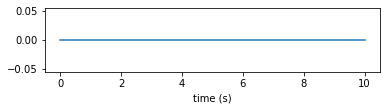

In [96]:
#plotting z vs t
plt.subplot(3,1,3)
z1 = r1_track[:,2]
plt.xlabel('time (s)')
plt.plot(t_track,z1)
plt.show()

In [64]:
#testing the final positions of the particle after each loop
'''
import statistics
x = np.array(test_r_final)[:,:,0]
y = np.array(test_r_final)[:,:,1]
z = np.array(test_r_final)[:,:,2]
t = test_t_final
print('r',test_r_final)
print('time',test_t_final)
plt.subplot(1,2,1)
plt.scatter(x,y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.subplot(1,2,2)
plt.scatter(t,z)
plt.xlabel('t (s)')
plt.ylabel('z (m)')
print(np.std(x),np.std(y),np.std(z))
'''

"\nimport statistics\nx = np.array(test_r_final)[:,:,0]\ny = np.array(test_r_final)[:,:,1]\nz = np.array(test_r_final)[:,:,2]\nt = test_t_final\nprint('r',test_r_final)\nprint('time',test_t_final)\nplt.subplot(1,2,1)\nplt.scatter(x,y)\nplt.xlabel('x (m)')\nplt.ylabel('y (m)')\n\nplt.subplot(1,2,2)\nplt.scatter(t,z)\nplt.xlabel('t (s)')\nplt.ylabel('z (m)')\nprint(np.std(x),np.std(y),np.std(z))\n"

In [13]:
#do this to avoid this notebook freezing and not opening

clear = input("clear output? y/n:")
if clear == "y":
    from IPython.display import clear_output
    clear_output(wait=True)
    print("output cleared")

output cleared
